# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [69]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import requests
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anduc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [70]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv('news_api')

In [71]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [72]:
# Fetch the Bitcoin news articles

btc = newsapi.get_everything(q="Bitcoin", language="en")

In [73]:
# Fetch the Ethereum news articles
eth = newsapi.get_everything(q="Ethereum", language="en")


In [74]:
# Create the Bitcoin sentiment scores DataFrame
#btc_df = pd.DataFrame.from_dict(btc["articles"])

btc_sentiments = []

for article in btc["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]
btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.0,0.942
1,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.0,1.000
2,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.0,0.829
3,2021-04-23,Cryptocurrency prices continued to tumble Frid...,0.0000,0.000,0.0,1.000
4,2021-04-13,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.0,0.865


In [75]:
# Create the Ethereum sentiment scores DataFrame
# Create the Bitcoin sentiment scores DataFrame
#btc_df = pd.DataFrame.from_dict(btc["articles"])

eth_sentiments = []

for article in eth["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]
eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-04,Their investors call them disruptive innovator...,-0.2144,0.054,0.111,0.835
1,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.000,0.829
2,2021-04-20,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.034,0.000,0.966
3,2021-05-01,New York (CNN Business)Bitcoin prices continue...,0.0000,0.000,0.000,1.000
4,2021-05-03,"The creators behind CryptoPunks, one of the mo...",0.4754,0.091,0.000,0.909


In [76]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.221960,0.061850,0.010300,0.927900
std,0.308283,0.068863,0.025375,0.076463
min,-0.381800,0.000000,0.000000,0.777000
25%,0.000000,0.000000,0.000000,0.857000
50%,0.160900,0.046000,0.000000,0.939000
75%,0.360375,0.119250,0.000000,1.000000
max,0.750600,0.179000,0.080000,1.000000


In [77]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.132390,0.042750,0.009250,0.948000
std,0.289687,0.059671,0.029097,0.064851
min,-0.340000,0.000000,0.000000,0.790000
25%,0.000000,0.000000,0.000000,0.924000
50%,0.000000,0.017000,0.000000,0.964000
75%,0.289900,0.062500,0.000000,1.000000
max,0.817600,0.210000,0.111000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC has the highest mean positive score at 0.062 compared to ETH at 0.43.

Q: Which coin had the highest compound score?

A: ETH has the highest compound score with a max of 0.82 compared to BTC at 0.75.

Q. Which coin had the highest positive score?

A: ETH has the highest positive score with a max of 0.21 compared to BTC at 0.18.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [78]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [79]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
my_stopwords = stopwords.words('english')
# Expand the default stopwords list if necessary
sw_addon = ['aft','dal','ac','frid','mome','r','n','reuters', 'r','nthe','nfile' ]#for some reason I don't want these
my_stopwords = my_stopwords.append(sw_addon)

my_stopwords

In [82]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the stop words
    sw = set(stopwords.words('english') + sw_addon)
    # Remove the punctuation from text
    #regex = re.compile("[^a-zA-Z ]")
   # re_clean = regex.sub('', text)
    
    
    letters_only = re.sub("[^a-zA-Z]"," ", str(text))
    
    # Create a tokenized list of the words
    words = word_tokenize(letters_only)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    
    
    return output

In [83]:
# Create a new tokens column for Bitcoin
btc_tokens = tokenizer(btc_df['text'])
btc_tokens

['shares',
 'square',
 'today',
 'tesla',
 'relationship',
 'bitcoin',
 'cryptocurrency',
 'continues',
 'gain',
 'mainstream',
 'cryptocurrency',
 'price',
 'continued',
 'tumble',
 'crypto',
 'industry',
 'whole',
 'ha',
 'seen',
 'image',
 'copyrightgetty',
 'images',
 'nimage',
 'captionel',
 'earth',
 'day',
 'prime',
 'time',
 'brand',
 'people',
 'venmo',
 'jumping',
 'aboard',
 'cryptocurrency',
 'ban',
 'new',
 'york',
 'cnn',
 'business',
 'bitcoin',
 'price',
 'continue',
 'big',
 'year',
 'crypto',
 'robinhood',
 'staff',
 'microstrategy',
 'two',
 'founder',
 'crusoe',
 'energy',
 'think',
 'going',
 'moon',
 'proponent',
 'staff',
 'napril',
 'micro',
 'jack',
 'dorsey',
 'co',
 'founder',
 'ceo',
 'twitter',
 'coinswitch',
 'kuber',
 'startup',
 'allows',
 'young',
 'staff',
 'photo',
 'tesla',
 'superc',
 'staff',
 'napril',
 'bitco',
 'staff',
 'nlondon',
 'april',
 'staff',
 'photo',
 'representati',
 'name',
 'text',
 'dtype',
 'object']

In [84]:
# Create a new tokens column for Ethereum
eth_tokens= tokenizer(eth_df['text'])
eth_tokens

['investor',
 'call',
 'disruptive',
 'innovator',
 'cryptocurrency',
 'continues',
 'gain',
 'mainstream',
 'venmo',
 'jumping',
 'aboard',
 'cryptocurrency',
 'ban',
 'new',
 'york',
 'cnn',
 'business',
 'bitcoin',
 'price',
 'continue',
 'creator',
 'behind',
 'cryptopunks',
 'one',
 'mo',
 'consensys',
 'key',
 'player',
 'crypto',
 'major',
 'staff',
 'photo',
 'representati',
 'representation',
 'virtual',
 'currency',
 'ethereum',
 'took',
 'get',
 'dfinity',
 'fi',
 'big',
 'year',
 'crypto',
 'robinhood',
 'story',
 'originally',
 'appeared',
 'stockmarketu',
 'article',
 'wa',
 'translated',
 'spanish',
 'e',
 'non',
 'fungible',
 'token',
 'nfts',
 'quickly',
 'becomin',
 'posted',
 'amp',
 'p',
 'dow',
 'jones',
 'indices',
 'launc',
 'representation',
 'virtual',
 'currency',
 'ethereum',
 'staff',
 'nsingapore',
 'may',
 'staff',
 'adds',
 'detail',
 'reported',
 'e',
 'staff',
 'photo',
 'representati',
 'ethereum',
 'ha',
 'outperformed',
 'major',
 'digital',
 'curren

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [85]:
from collections import Counter
from nltk import ngrams

In [86]:
# Generate the Bitcoin N-grams where N=2
btc_counts = list(ngrams(btc_tokens, n=2))

In [87]:
# Generate the Ethereum N-grams where N=2
eth_counts = list(ngrams(eth_tokens, n=2))

In [88]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
        
    return Counter(tokens).most_common(N)

In [89]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_counts)
#token_count(btc_tokens)

[(('staff', 'napril'), 2),
 (('staff', 'photo'), 2),
 (('shares', 'square'), 1),
 (('square', 'today'), 1),
 (('today', 'tesla'), 1),
 (('tesla', 'relationship'), 1),
 (('relationship', 'bitcoin'), 1),
 (('bitcoin', 'cryptocurrency'), 1),
 (('cryptocurrency', 'continues'), 1),
 (('continues', 'gain'), 1)]

In [90]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_counts)
#token_count(eth_tokens)

[(('staff', 'photo'), 2),
 (('photo', 'representati'), 2),
 (('representation', 'virtual'), 2),
 (('virtual', 'currency'), 2),
 (('currency', 'ethereum'), 2),
 (('investor', 'call'), 1),
 (('call', 'disruptive'), 1),
 (('disruptive', 'innovator'), 1),
 (('innovator', 'cryptocurrency'), 1),
 (('cryptocurrency', 'continues'), 1)]

In [91]:
#sentence = 'the cat in the hat'
#words = sentence.split()
#bigrams =list(ngrams(words, n=2))
#bigrams

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [92]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

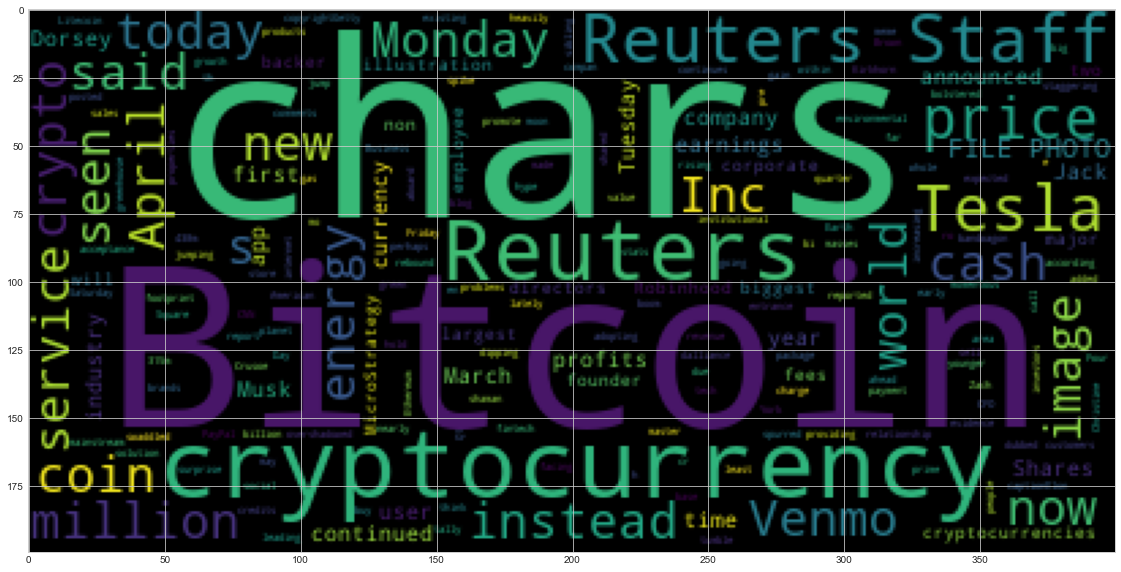

In [93]:
# Generate the Bitcoin word cloud

big_string = ' '.join(btc_df['text'])
#input_text = tokenizer(big_string)

wc = WordCloud().generate(big_string)
plt.imshow(wc)

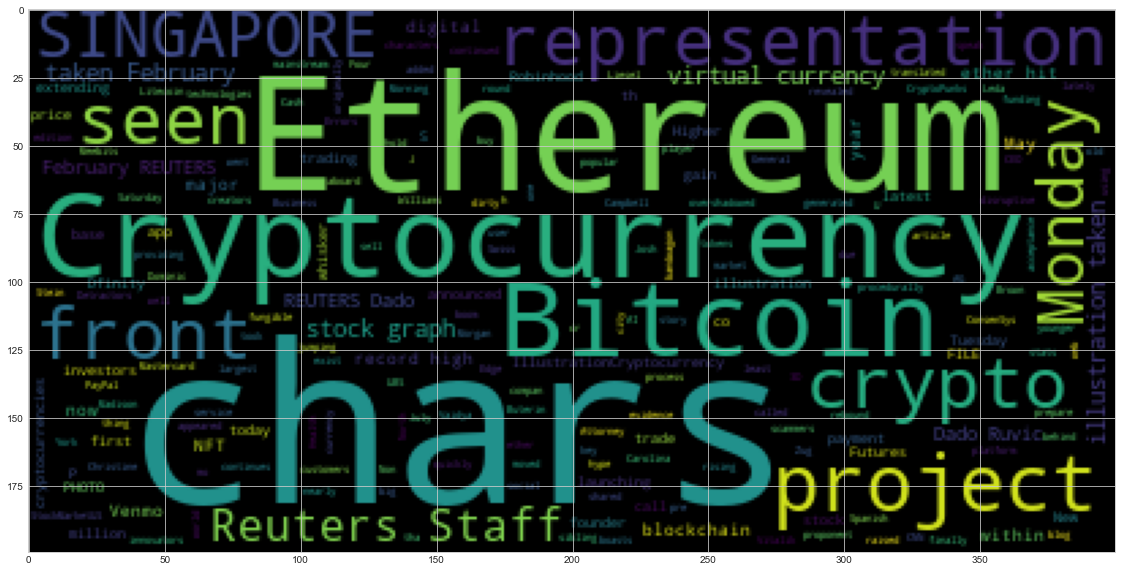

In [94]:
# Generate the Ethereum word cloud
big_string_ = ' '.join(eth_df['text'])
#input_text = tokenizer(big_string)

wc = WordCloud().generate(big_string_)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [95]:
import spacy
from spacy import displacy

In [96]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [97]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [98]:
# Concatenate all of the Bitcoin text together
big_string = ' '.join(btc_df['text'])


In [99]:
# Run the NER processor on all of the text
doc = nlp(big_string)
# Add a title to the document
# YOUR CODE HERE!

In [100]:
# Render the visualization
displacy.render(doc, style='ent') 


In [101]:
# List all Entities
entities = [ent.text for ent in doc.ents] 
entities = [i.lower().replace(' ', '_') for i in entities]
print(entities)

['more_than_6%', 'today', 'american', '$5.06_billion', '2021', '3.36', 'cfo', 'zach_kirkhorn', 'monday', 'paypal', 'bitcoin,_ethereum', 'bitcoin_cash', 'litecoin', 'venmo', '70_million', 'friday', 'bitcoin', '50,000', 'first', 'early_march', 'bitcoin', 'a_momentous_year', '2020', 'musk', 'tesla', 'tesla', 'first_quarter', '$438m', '315', 'bitcoin', ']_earth_day', 'jack_dorsey', 'venmo', 'tuesday', 'venmo', 'four', 'new_york', 'cnn', 'saturday', 'about_6%', 'nearly_$58,000', 'a_big_year', 'robinhood', 'today', 'christine_brown', 'robinhoods', 'reuters', 'reuters', 'inc', 'monday', 'two', 'crusoe_energy', 'two', 'today', 'dogecoin', 'reuters', 'april_12', 'reuters', 'monday', 'jack_dorsey', 'twitter', 'wednesday', 'elon_musk', 'bbc', 'coinswitch_kuber', 'india', 'thursday', '$25_million', 'indi', 'reuters', 'santa_clarita', 'california', 'u.s.', 'october_2,_2019', 'mike_blake\r\n', 'reuters', '$27_million', 'reuters', 'april_18', 'reuters', '7.7%', '55,408.08', 'sunday', '4,624.21', 'reu

---

### Ethereum NER

In [102]:
# Concatenate all of the Ethereum text together
big_string_ = ' '.join(eth_df['text'])


In [103]:
# Run the NER processor on all of the text
doc_ = nlp(big_string_)

# Add a title to the document
# YOUR CODE HERE!

In [104]:
# Render the visualization
displacy.render(doc_, style='ent') 


In [105]:
# List all Entities
entities_ = [ent.text for ent in doc.ents] 
entities_ = [i.lower().replace(' ', '_') for i in entities_]
print(entities_)

['more_than_6%', 'today', 'american', '$5.06_billion', '2021', '3.36', 'cfo', 'zach_kirkhorn', 'monday', 'paypal', 'bitcoin,_ethereum', 'bitcoin_cash', 'litecoin', 'venmo', '70_million', 'friday', 'bitcoin', '50,000', 'first', 'early_march', 'bitcoin', 'a_momentous_year', '2020', 'musk', 'tesla', 'tesla', 'first_quarter', '$438m', '315', 'bitcoin', ']_earth_day', 'jack_dorsey', 'venmo', 'tuesday', 'venmo', 'four', 'new_york', 'cnn', 'saturday', 'about_6%', 'nearly_$58,000', 'a_big_year', 'robinhood', 'today', 'christine_brown', 'robinhoods', 'reuters', 'reuters', 'inc', 'monday', 'two', 'crusoe_energy', 'two', 'today', 'dogecoin', 'reuters', 'april_12', 'reuters', 'monday', 'jack_dorsey', 'twitter', 'wednesday', 'elon_musk', 'bbc', 'coinswitch_kuber', 'india', 'thursday', '$25_million', 'indi', 'reuters', 'santa_clarita', 'california', 'u.s.', 'october_2,_2019', 'mike_blake\r\n', 'reuters', '$27_million', 'reuters', 'april_18', 'reuters', '7.7%', '55,408.08', 'sunday', '4,624.21', 'reu

---